In [0]:
from google.colab import drive

import os

In [0]:
# Mount Google drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
DATA_DIR = '/drive/My Drive/cs143_final/emotion_data'

In [0]:
os.chdir(DATA_DIR)

In [0]:
os.listdir()

['validation_data.npy',
 'train_label.npy',
 'train_data.npy',
 'validation_label.npy',
 'testing_data.npy',
 'testing_label.npy',
 'emotion_detect_without_augumentation.data-00000-of-00002',
 'emotion_detect_without_augumentation.data-00001-of-00002',
 'emotion_detect_without_augumentation.index',
 'checkpoint',
 'weights']

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import numpy as np

import matplotlib.pyplot as plt

In [0]:
# get data
train_data = np.load('train_data.npy')
train_label = np.load('train_label.npy')

validation_data = np.load('validation_data.npy')
validation_label = np.load('validation_label.npy')

testing_data = np.load('testing_data.npy')
testing_label = np.load('testing_label.npy')

In [0]:
model = models.Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        3

In [0]:
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_label, epochs=25, 
                    validation_data=(validation_data, validation_label))

Epoch 1/25
898/898 [==============================] - 19s 21ms/step - loss: 1.8597 - accuracy: 0.2268 - val_loss: 1.8641 - val_accuracy: 0.2449
Epoch 2/25
898/898 [==============================] - 18s 20ms/step - loss: 1.8339 - accuracy: 0.2401 - val_loss: 1.8045 - val_accuracy: 0.2452
Epoch 3/25
898/898 [==============================] - 18s 20ms/step - loss: 1.7178 - accuracy: 0.2982 - val_loss: 1.5631 - val_accuracy: 0.4026
Epoch 4/25
898/898 [==============================] - 18s 20ms/step - loss: 1.5688 - accuracy: 0.3827 - val_loss: 1.4348 - val_accuracy: 0.4439
Epoch 5/25
898/898 [==============================] - 18s 20ms/step - loss: 1.4679 - accuracy: 0.4268 - val_loss: 1.3651 - val_accuracy: 0.4742
Epoch 6/25
898/898 [==============================] - 19s 21ms/step - loss: 1.3890 - accuracy: 0.4632 - val_loss: 1.2791 - val_accuracy: 0.5065
Epoch 7/25
898/898 [==============================] - 18s 21ms/step - loss: 1.3309 - accuracy: 0.4901 - val_loss: 1.2300 - val_accuracy:

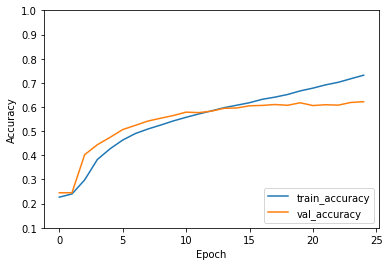

In [0]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [0]:
test_loss, test_acc = model.evaluate(testing_data,  testing_label, verbose=2)

113/113 - 1s - loss: 1.1128 - accuracy: 0.6236


In [0]:
# # Save the weights
# model.save_weights('./checkpoints/my_checkpoint')

# # Create a new model instance
# model = create_model()

# # Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')

# # Evaluate the model
# loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [0]:
 model.save_weights('./weights/emotion_detect_without_augumentation')